<a href="https://colab.research.google.com/github/Baudier13/NN/blob/main/redes_neuronales_2022_practico_5_resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El modelo *Integrate and Fire*

## Teoría

El modelo *Integrate and Fire* del comportamiento de una neurona viene descripto por dos ingredientes. En primer lugar, la ODE

\begin{eqnarray}
\frac{dV}{dt}
&=&
\frac{1}{\tau}
\left(
E-V(t)
+
RI(t)
\right)
\end{eqnarray}

donde:

* $V(t)$ representa el potencial de membrana al tiempo $t$,

* $E\approx -65mV$ representa el potencial de reposo,

* $\tau\approx 10ms$ representa el tiempo de relajación,

* $R\approx 10M\Omega$ representa una resistencia eléctrica, y

* $I(t)\approx 1nA$ representa una corriente/señal de entrada.

En segundo lugar, un mecanismo de disparo definido por

\begin{eqnarray}
V(t) \to E
\end{eqnarray}

cuando 

\begin{eqnarray}
V(t) > V_u
\end{eqnarray}

donde:

* $V_u \approx -50mV$ representa un potencial umbral.

Es decir, según el mecanismo de disparo, el potencial de membrana $V(t)$ se resetea a su valor de reposo $E$ si supera cierto valor umbral $V_u$.

## Unidades

* p = pico = $10^{-12}$
* n = nano = $10^{-9}$
* $\mu$ = micro = $10^{-6}$
* m = mili = $10^{-3}$
* ...
* k = kilo = $10^{3}$
* M = Mega = $10^{6}$
* G = Giga = $10^{9}$
* T = Tera = $10^{12}$

### Ley de Ohm

Si $\Omega$ = Ohmio, V = Voltio y A = Amper, entonces

$$ 1\, Ohm = 1 \Omega = \frac{1 V}{1 A} $$

### Ley RC

Si s = segundos y F = Faradios, entonces

$$ 1 s = 1 \Omega \times 1 F $$ 

### Hertz

Si Hz = Hertz, luego

$$ 1 Hz = \frac{1}{1 s} $$

### Referencias

* https://technologystudent.com/elec1/ohm1.htm

* https://en.wikipedia.org/wiki/Biological_neuron_model#Leaky_integrate-and-fire

* https://compneuro.neuromatch.io/tutorials/W2D3_BiologicalNeuronModels/student/W2D3_Tutorial1.html



## **Ejercicio 1)** Importando librerías

**a)** Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

**b)** Suba el archivo "libreria" `ode.py` que fabricó en el práctico 4), e impórtelo.

In [ ]:
# 1.a)
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [ ]:
# 1.b)
import ode

## **Ejercicio 2)** Dinámica con mecanismo de disparo desactivado

En lo que sigue, se considera desactivado el mecanismo de disparo.

**a)** Resuelva analíticamente la ODE del modelo *Integrate and Fire* para una condición inicial arbitraria $V(0)=V_0$ y una corriente de entrada $I=0$.

**b)** Grafique la solución para $V_0=10mV$ y $t\in [0,100]ms$. Incorpore al gráfico una línea punteada indicando el potencial de reposo.

**c)** Realice un análisis geométrico de la solución calculada. Incorpore flechas del campo vectorial así como los puntos fijos estables, inestables y marginales, si los hubiere.

**d)** Repita **a)**, **b)** y **c)** para el caso de corriente de entrada constante, $I=2$nA.

### Extra

**e)** Resuelva analíticamente la ODE para una corriente de entrada $I:t\to I(t)$ arbitraria.

In [ ]:
# 2.a)

Partimos de la ODE para $I=0$

\begin{eqnarray}
\frac{dV}{dt}
&=&
\frac{1}{\tau}
\left(
E-V(t)
\right)
\end{eqnarray}

Para resolverla, se propone el cambio de variable $x(t)=E-V(t)$, obteniéndose

\begin{eqnarray}
\frac{dx}{dt}
&=&
-
\frac{1}{\tau}
x
\\
\frac{dx}{x}
&=&
-
\frac{1}{\tau}
dt
\\
\ln x(t) - \ln x(0)
&=&
-
\frac{t}{\tau}
\\
\ln x(t)
&=&
-
\frac{t}{\tau}
+
\ln x(0)
\\
x(t)
&=&
x(0)e^{-\frac{t}{\tau}}
\\
E-V(t)
&=&
\left(E-V(0)\right)e^{-\frac{t}{\tau}}
\\
V(t)
&=&
E+\left(V(0)-E\right)e^{-\frac{t}{\tau}}
\end{eqnarray}

In [ ]:
# 2.b)
E = -65 #mV
tau = 10 #ms
V0 = 10 #mV

def V(t):
    return E+(V0-E)*np.exp(-t/tau)

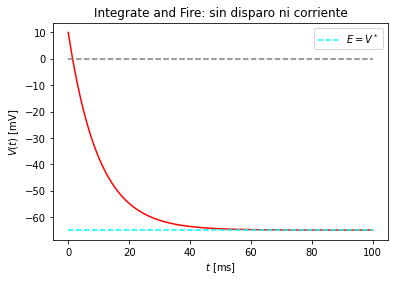

In [ ]:
plt.xlabel('$t$ [ms]')
plt.ylabel('$V(t)$ [mV]')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
valores_t=np.linspace(0,100,100)
valores_V=np.vectorize(V)(valores_t)
plt.plot(valores_t,valores_V,label="",linestyle='-',c='red')
plt.plot(valores_t,np.zeros(len(valores_t)),label="",linestyle='--',c='gray')
plt.plot(valores_t,E*np.ones(len(valores_t)),label="$E=V^*$",linestyle='--',c='cyan')
plt.title('Integrate and Fire: sin disparo ni corriente')
plt.legend()

In [ ]:
# 2.c)

El lado derecho de la ODE es

\begin{eqnarray}
f(V) = \frac{1}{\tau}(E-V)
\end{eqnarray}

Por ende, $V(t)=V^*$ es un punto fijo si

\begin{eqnarray}
0
=
f(V^*)
&=&
\frac{1}{\tau}
\left(
E-V^*
\right)
\\
V^* 
&=&
E
\end{eqnarray}

Dicho punto fijo es estable porque

\begin{eqnarray}
f'(V^*)
=
\frac{-1}{\tau}
<
0
\end{eqnarray}

Con ello, graficamos

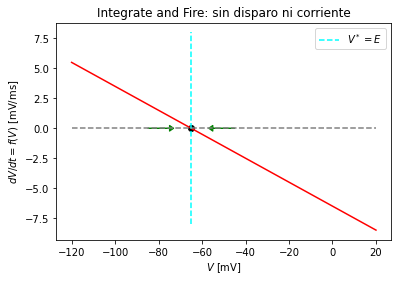

In [ ]:
Vfix = E
def f(V):
    return (E-V)/tau
plt.xlabel('$V$ [mV]')
plt.ylabel('$dV/dt=f(V)$ [mV/ms]')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
valores_V=np.linspace(-120,20,100)
valores_f=np.vectorize(f)(valores_V)
plt.plot(valores_V,valores_f,label="",linestyle='-',c='red')
plt.plot(valores_V,np.zeros(len(valores_V)),label="",linestyle='--',c='gray')
plt.plot([Vfix,Vfix],[-8,8],label="$V^*=E$",linestyle='--',c='cyan')
plt.arrow(Vfix-20.0,0.0,10.0,0.0,head_width=0.5,head_length=2,fc='g',ec='g')
plt.arrow(Vfix+20.0,0.0,-10.0,0.0,head_width=0.5,head_length=2,fc='g',ec='g')
plt.scatter([Vfix],[0],c='black')
plt.title('Integrate and Fire: sin disparo ni corriente')
plt.legend()

In [ ]:
# 2.d.a)

Ahora, $I=2$nA constante. Hay un punto fijo determinado por

\begin{eqnarray}
0
=
\frac{dV}{dt}
&=&
\frac{1}{\tau}
\left(
E+RI-V(t)
\right)
\end{eqnarray}

i.e. 

\begin{eqnarray}
V^*
&=&
E+RI=-65mV+(10\times 10^6\Omega)(2\times 10^{-9}A)
\\
&=&-65mV+20\times 10^{-3}\Omega A
\\
&=&-65mV+20\times 10^{-3}V
\\
&=&
-65mV+20mV
\\
&=&
-45mV
\end{eqnarray}

Proponemos el cambio de variable $x=V^*-V$, y obtenemos

\begin{eqnarray}
\frac{dx}{dt}
&=&
-
\frac{1}{\tau}
x
\\
&...&
\\
x(t)
&=&
x(0)e^{-\frac{t}{\tau}}
\\
V^*-V(t)
&=&
\left(V^*-V(0)\right)e^{-\frac{t}{\tau}}
\\
V(t)
&=&
V^*+\left(V(0)-V^*\right)e^{-\frac{t}{\tau}}
\end{eqnarray}

In [ ]:
# 2.d.b)
E = -65 #mV
tau = 10 #ms
V0 = 10 #mV
I = 2 #nA
R = 10 #MOhms
Vfix = E+I*R
def V(t):
    return Vfix+(V0-Vfix)*np.exp(-t/tau)

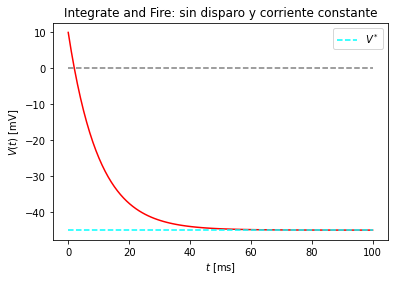

In [ ]:
plt.xlabel('$t$ [ms]')
plt.ylabel('$V(t)$ [mV]')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
valores_t=np.linspace(0,100,100)
valores_V=np.vectorize(V)(valores_t)
plt.plot(valores_t,valores_V,label="",linestyle='-',c='red')
plt.plot(valores_t,[Vfix]*len(valores_t),label="$V^*$",linestyle='--',c='cyan')
plt.plot(valores_t,np.zeros(len(valores_t)),label="",linestyle='--',c='gray')
plt.title('Integrate and Fire: sin disparo y corriente constante')
plt.legend()

In [ ]:
# 2.d.c)

De manera similar al caso anterior, el lado derecho de la ODE es

\begin{eqnarray}
f(V)
&=&
\frac{1}{\tau}(E+IR-V)
\end{eqnarray}

Por ende, existe un punto fijo $V^*$ dado por

\begin{eqnarray}
0
=
f(V)
&=&
\frac{1}{\tau}(E+IR-V)
\\
V^*
&=&
E+IR
\end{eqnarray}

El punto fijo es estable porque

\begin{eqnarray}
f'(V^*)
=
\frac{-1}{\tau}
<
0
\end{eqnarray}
 
 Por ende, graficamos


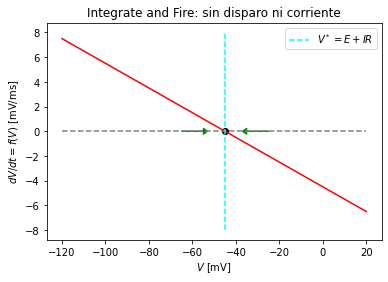

In [ ]:
def f(V):
    return (Vfix-V)/tau
plt.xlabel('$V$ [mV]')
plt.ylabel('$dV/dt=f(V)$ [mV/ms]')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
valores_V=np.linspace(-120,20,100)
valores_f=np.vectorize(f)(valores_V)
plt.plot(valores_V,valores_f,label="",linestyle='-',c='red')
plt.plot(valores_V,np.zeros(len(valores_V)),label="",linestyle='--',c='gray')
plt.plot([Vfix,Vfix],[-8,8],label="$V^*=E+IR$",linestyle='--',c='cyan')
plt.arrow(Vfix-20.0,0.0,10.0,0.0,head_width=0.5,head_length=2,fc='g',ec='g')
plt.arrow(Vfix+20.0,0.0,-10.0,0.0,head_width=0.5,head_length=2,fc='g',ec='g')
plt.scatter([Vfix],[0],c='black')
plt.title('Integrate and Fire: sin disparo ni corriente')
plt.legend()

In [ ]:
# 2.e)

### El método del factor de integración

La solución se obtiene por el *método del factor de integración*.
Considérese una ODE de la forma

\begin{eqnarray}
\frac{dx}{dt}(t)
+
p(t)x(t)
=
q(t)
\;\;\;\;
\;\;\;\;
(1)
\end{eqnarray}

donde, $p:t\to p(t)$ y $q:t\to q(t)$ son funciones arbitrarias.
Asumiendo que la condición inicial es $x(t_0)$, se propone el factor de integración

\begin{eqnarray}
g(t):=e^{h(t)}:=e^{\int_{t_0}^t dt'\, p(t')}
\end{eqnarray}

el cuál satisface

\begin{eqnarray}
\frac{dg}{dt}(t)
&=&
\frac{de^{h(t)}}{dt}(t)
\\
&=&
e^{h(t)}\frac{dh}{dt}(t)
\\
&=&
e^{h(t)}p(t)
\\
&=&
g(t)p(t)
\end{eqnarray}

Luego

\begin{eqnarray}
\frac{dgx}{dt}(t)
&=&
\frac{dg}{dt}(t)x(t)
+
g(t)\frac{dx}{dt}(t)
\\
&=&
g(t)p(t)x(t)
+
g(t)\frac{dx}{dt}(t)
\\
&=&
g(t)
\bigg(
p(t)x(t)
+
\frac{dx}{dt}(t)
\bigg)
\\
&=&
g(t)
q(t)
\end{eqnarray}

donde, en la última línea, utilizamos la ODE de la Ec. $(1)$.
De esta manera, se puede integrar

\begin{eqnarray}
\int_{t_0}^t dt'\,
\frac{dgx}{dt}(t')
=
g(t)x(t)-g(t_0)x(t_0)
&=&
\int dt_{t_0}^t\,
g(t)
q(t)
\end{eqnarray}

En resumen, la solución a la ODE de la Ec. $(1)$ es

\begin{eqnarray}
x(t)
&=&
\frac{1}{g(t)}
\left(
g(t_0)x(t_0)
+
\int_{t_0}^t dt'\,
g(t')
q(t')
\right)
\end{eqnarray}

### Aplicación del método a la ODE del modelo Integrated and Fire

La ODE puede reescribirse como

\begin{eqnarray}
\frac{dV}{dt}(t)
+
\frac{1}{\tau}V(t)
&=&
\frac{1}{\tau}
\bigg(
E
+
RI(t)
\bigg)
\end{eqnarray}

en donde se reconocen las identificaciones

* $x(t) = V(t)$

* $p(t) = \frac{1}{\tau}$

* $q(t) = E+RI(t)$.

De esta manera

\begin{eqnarray}
g(t)
&=&
e^{h(t)}
\\
&=&
e^{\int_{t_0}^t dt' p(t)}
\\
&=&
e^{\int_{t_0}^t dt' \tau^{-1}}
\\
&=&
e^{\frac{t-t_0}{\tau}}
\end{eqnarray}

Luego, la solución de la ODE resulta

\begin{eqnarray}
V(t)
&=&
e^{-\frac{t-t_0}{\tau}}
\left(
V(t_0)
+
\frac{1}{\tau}
\int_{t_0}^t dt'\,
e^{\frac{'t-t_0}{\tau}}
\left(
E
+
RI(t')
\right)
\right)
\end{eqnarray}

## **Ejercicio 3)** Dinámica con mecanismo de disparo activado

**a)** Resuelva numéricamente la ODE del modelo *Integrate and Fire* en el intervalo $t\in [0,200]ms$ para la condición inicial $V(0)=E$ y una corriente de entrada $I(t)=I_0$ para todo $t$ con $I_0=2nA$. Utilice el paso de integración $h=0.05ms$.

**b)** Grafique la solución computada en el inciso **3.a)**. Incorpore al gráfico la solución exacta del inciso **2.a)**, en donde el mecanismo de disparo está desactivado, para la misma condición inicial del inciso **3.a)**. Grafique, también, líneas punteadas horizontales marcando los valores de $V^*$ y $V_u$.

**c)** Para el caso indicado en el inciso **3.a)**, calcule analíticamente el período de disparo. 
Observe si el valor computado corresponde con el observado en el inciso **3.b)**.
Grafíque la frencuencia en función de $I_0$.
Que ocurre para valores pequeños de $I_0$?


**d)** Repita **3.a)** y **3.b)** con $I_e(t)=I_0 \cos(t/30ms)$ e $I_0=2.5nA$ para $0\,ms\leq t\leq 500\,ms$. En este caso, no incluya la solución exacta del inciso **2.a)**, pero sí lineas punteadas horizontales para marcar los valores de $E$ y $V_u$.

**e)** Repita **3.a)** y **3.b)** con 

\begin{equation}
I(t)= I_0 \, \left( 
    \cos{\left( \frac{t}{3ms} \right)} +
    \sin{\left( \frac{t}{5ms} \right)} +
    \cos{\left( \frac{t}{7ms} \right)} +
    \sin{\left( \frac{t}{11ms} \right)} +
    \cos{\left( \frac{t}{13ms} \right)}  \right)^2 \, nA \,
    \;\;\;(4)
\end{equation}

e $I_0=0.35 nA$ para $0\,ms\leq t\leq 200\,ms$. Al igual que en inciso anterior, no incluya la solución exacta del inciso **2.a)**, pero sí lineas punteadas horizontales para marcar los valores de $E$ y $V_u$.

In [ ]:
E   = -65 #mV
tau = 10  #ms
R   = 10  #mOhms
I0  = 2   #nA
def I(t):
    return I0 #nA
Vu  = -50 #mV

p = [E,tau,R,I,Vu]

def f(x,t,p):
    """
    V   = x[0]
    E   = p[0]
    tau = p[1]
    R   = p[2]
    I   = p[3]
    Vu  = p[4]

    donde I : t -> I(t)
    """
    V   = x[0]
    E   = p[0]
    tau = p[1]
    R   = p[2]
    I   = p[3]
    #Vu  = p[4]
    return np.array([(E+R*I(t)-V)/tau])

def c(x,t,p):
    """
    V   = x[0]
    E   = p[0]
    tau = p[1]
    R   = p[2]
    I   = p[3]
    Vu  = p[4]

    donde I : t -> I(t)
    """  
    V   = x[0]
    E   = p[0]
    #tau = p[1]
    #R   = p[2]
    #I   = p[3]
    Vu  = p[4]
    if V>Vu:
        V=E
    return np.array([V])

In [ ]:
a  = 0   #ms
b  = 200 #ms
xa = np.array([E])
h = 0.05 # ms
k = int((b-a)/h)

In [ ]:
t,w= ode.integrador_ode(ode.rk4,f,xa,a,b,k,p,c=c)

In [ ]:
# 3.b)
V0=E
Vfix = E+I(0)*R
def Vex(t):
    return Vfix+(V0-Vfix)*np.exp(-t/tau)

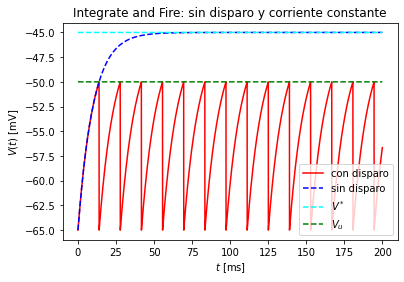

In [ ]:
plt.xlabel('$t$ [ms]')
plt.ylabel('$V(t)$ [mV]')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
valores_t=t
valores_V=w[0,:]
plt.plot(valores_t,valores_V,label="con disparo",linestyle='-',c='red')
plt.plot(valores_t,np.vectorize(Vex)(valores_t),label="sin disparo",linestyle='--',c='blue')
plt.plot(valores_t,[Vfix]*len(valores_t),label="$V^*$",linestyle='--',c='cyan')
plt.plot(valores_t,[Vu]*len(valores_t),label="$V_u$",linestyle='--',c='green')
#plt.plot(valores_t,np.zeros(len(valores_t)),label="",linestyle='--',c='gray')
plt.title('Integrate and Fire: sin disparo y corriente constante')
plt.legend()

In [ ]:
# 3.c)

El período de disparo es el tiempo $t$ en el cual $V(t)$ alcanza el valor $V_u$ partiendo del valor de reseteo $V(0)=E$. Como se calculó en el inciso **)**, la solución exacta para este caso viene dada por


\begin{eqnarray}
V(t)
&=&
V^*+\left(V(0)-V^*\right)e^{-\frac{t}{\tau}}
\end{eqnarray}

donde $V^*=E+RI_0$ y $V(0)=E$. Luego

\begin{eqnarray}
V(t)
&=&
E+I_0R\bigg(1-e^{-\frac{t}{\tau}}\bigg)
\end{eqnarray}

Entonces,

\begin{eqnarray}
1-\frac{V_u-E}{I_0R}
&=&
e^{-\frac{t}{\tau}}
\\
-\tau\ln\bigg(1-\frac{V_u-E}{I_0R}\bigg)
&=&
t
\\
t
&=&
\tau\ln\bigg(\frac{I_0R}{E+RI_0-V_u}\bigg)
\end{eqnarray}

Esta fórmula tiene sentido siempre que 

$$E+RI_0>V_u$$

Es decir, deja de tener sentido cuando el valor de la corriente $I_0$ se aproxima a la corriente crítica $I_c:=(V_u-E)/R=1.5nA$ por arriba.

In [ ]:
# Corriente crítica.
Ic = (Vu-E)/R

In [ ]:
def periodo(I0):
    return tau*np.log(I0*R/(I0*R+E-Vu))    
def frecuencia(I0):
    return 1/periodo(I0)

Text(0.5, 1.0, 'Integrate and Fire: frecuencia de disparo')

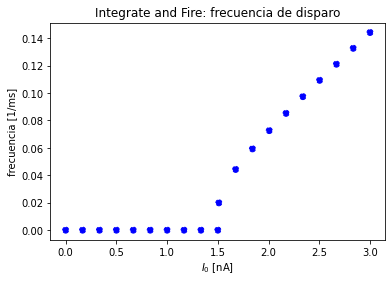

In [ ]:
valores_I0 = np.linspace(Ic+0.01,2*Ic,10)

plt.xlabel('$I_0$ [nA]')
plt.ylabel('frecuencia [1/ms]')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
plt.scatter(np.linspace(0,Ic,10),np.zeros(10),label="",linestyle='--',c='blue')
plt.scatter(valores_I0,np.vectorize(frecuencia)(valores_I0),label="",linestyle='--',c='blue')
#plt.plot(valores_t,np.vectorize(Vex)(valores_t),label="sin disparo",linestyle='--',c='blue')
#plt.plot(valores_t,[Vfix]*len(valores_t),label="$V^*$",linestyle='--',c='cyan')
#plt.plot(valores_t,[Vu]*len(valores_t),label="$V_u$",linestyle='--',c='green')
#plt.plot(valores_t,np.zeros(len(valores_t)),label="",linestyle='--',c='gray')
plt.title('Integrate and Fire: frecuencia de disparo')
#plt.legend()

In [ ]:
I0 = 2 #nA
t = periodo(I0)
frec = frecuencia(I0)
print("El período para el caso en que I_0=2nA es ",t,"ms. y la frecuencia es ",frec," Hz.")
print("Esto coincide (aproximadamente) con lo observado en la figura.")

El período para el caso en que I_0=2nA es  13.862943611198906 ms. y la frecuencia es  0.07213475204444816  Hz.
Esto coincide (aproximadamente) con lo observado en la figura.


In [ ]:
# 3.d)
a=0   #ms
b=500 #ms
I0 = 2.5 #nA
def I(t):
    return I0*np.cos(t/30)
p = [E,tau,R,I,Vu]

In [ ]:
t,w= ode.integrador_ode(ode.rk4,f,xa,a,b,k,p,c=c)

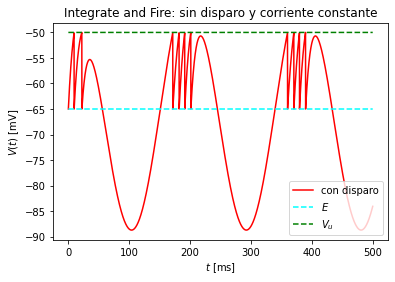

In [ ]:
plt.xlabel('$t$ [ms]')
plt.ylabel('$V(t)$ [mV]')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
valores_t=t
valores_V=w[0,:]
plt.plot(valores_t,valores_V,label="con disparo",linestyle='-',c='red')
plt.plot(valores_t,[E]*len(valores_t),label="$E$",linestyle='--',c='cyan')
plt.plot(valores_t,[Vu]*len(valores_t),label="$V_u$",linestyle='--',c='green')
plt.title('Integrate and Fire: sin disparo y corriente constante')
plt.legend()

In [ ]:
# 3.e)
a=0   #ms
b=200 #ms
I0 = 0.35 #nA
def I(t):
    return I0*(np.cos(t/3)+np.sin(t/5)+np.cos(t/7)+np.sin(t/11)+np.cos(t/13))**2
p = [E,tau,R,I,Vu]

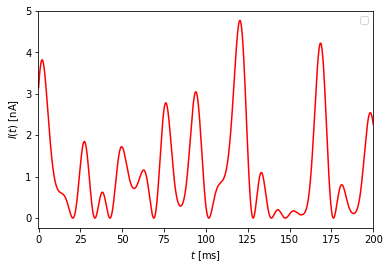

In [ ]:
plt.xlabel('$t$ [ms]')
plt.ylabel('$I(t)$ [nA]')
plt.xlim(-0.1,200)
#plt.ylim(-0.1,1.1)
valores_t=t
plt.plot(valores_t,np.vectorize(I)(valores_t),label="",linestyle='-',c='red')
plt.title('')
plt.legend()

In [ ]:
t,w= ode.integrador_ode(ode.rk4,f,xa,a,b,k,p,c=c)

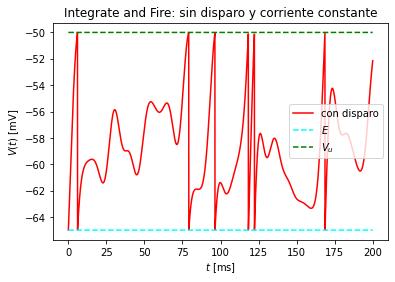

In [ ]:
plt.xlabel('$t$ [ms]')
plt.ylabel('$V(t)$ [mV]')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
valores_t=t
valores_V=w[0,:]
plt.plot(valores_t,valores_V,label="con disparo",linestyle='-',c='red')
plt.plot(valores_t,[E]*len(valores_t),label="$E$",linestyle='--',c='cyan')
plt.plot(valores_t,[Vu]*len(valores_t),label="$V_u$",linestyle='--',c='green')
plt.title('Integrate and Fire: sin disparo y corriente constante')
plt.legend()